# Prevendo ocorrência de diabetes

In [1]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib

print("Versões utilizadas")
print(f'Pandas: {pd.__version__}')
print(f"NumPy:{np.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Scikit-Learn: {sklearn.__version__}")

Versões utilizadas
Pandas: 1.0.5
NumPy:1.18.5
Matplotlib: 3.2.2
Scikit-Learn: 0.23.1


In [2]:
# Importando as bibliotecas

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import (classification_report, confusion_matrix,
                             plot_confusion_matrix, roc_curve)
from sklearn.model_selection import (cross_val_score, learning_curve,
                                     train_test_split)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Coleta dos dados e análise exploratória

In [3]:
colunas_traduzidas = [
    'Idade',
    'Gênero',
    'Poliúria',
    'Polidispsia',
    'Perda repentina de peso',
    'Fraqueza',
    'Polifagia',
    'Candidiase',
    'Visão embaçada',
    'Coceira',
    'Irritações',
    'Cicatrização prolongada',
    'Paralisia parcial',
    'Fraqueza muscular',
    'Calvice',
    'Obesidade',
    'Diabetes'
]

# Carrega o conjunto de dados
diabetes = pd.read_csv('diabetes_data_upload.csv', names=colunas_traduzidas, skiprows=1)

- Link para o dataset: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.

In [4]:
# Mostrando as primeiras linhas
diabetes.head(10)

,Idade,Gênero,Poliúria,Polidispsia,Perda repentina de peso,Fraqueza,Polifagia,Candidiase,Visão embaçada,Coceira,Irritações,Cicatrização prolongada,Paralisia parcial,Fraqueza muscular,Calvice,Obesidade,Diabetes
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [5]:
# Quantidade de registros e colunas
diabetes.shape

(520, 17)

In [6]:
# Distribuição da variável alvo
diabetes['Diabetes'].value_counts()

Positive    320
Negative    200
Name: Diabetes, dtype: int64

In [7]:
# Checando valores missing
diabetes.isna().sum()

Idade                      0
Gênero                     0
Poliúria                   0
Polidispsia                0
Perda repentina de peso    0
Fraqueza                   0
Polifagia                  0
Candidiase                 0
Visão embaçada             0
Coceira                    0
Irritações                 0
Cicatrização prolongada    0
Paralisia parcial          0
Fraqueza muscular          0
Calvice                    0
Obesidade                  0
Diabetes                   0
dtype: int64

In [8]:
# Verificando os valores únicos para cada atributo
diabetes.nunique()

Idade                      51
Gênero                      2
Poliúria                    2
Polidispsia                 2
Perda repentina de peso     2
Fraqueza                    2
Polifagia                   2
Candidiase                  2
Visão embaçada              2
Coceira                     2
Irritações                  2
Cicatrização prolongada     2
Paralisia parcial           2
Fraqueza muscular           2
Calvice                     2
Obesidade                   2
Diabetes                    2
dtype: int64

In [9]:
# Checando o tipo de variáveis dos dados
diabetes.dtypes

Idade                       int64
Gênero                     object
Poliúria                   object
Polidispsia                object
Perda repentina de peso    object
Fraqueza                   object
Polifagia                  object
Candidiase                 object
Visão embaçada             object
Coceira                    object
Irritações                 object
Cicatrização prolongada    object
Paralisia parcial          object
Fraqueza muscular          object
Calvice                    object
Obesidade                  object
Diabetes                   object
dtype: object

In [10]:
# Estatística descritiva da idade
diabetes['Idade'].describe().round(0)

count    520.0
mean      48.0
std       12.0
min       16.0
25%       39.0
50%       48.0
75%       57.0
max       90.0
Name: Idade, dtype: float64

# Preprocessamento dos dados

In [11]:
# Convertendo as variáveis categórias para valores numéricos
for col in diabetes.select_dtypes(include='object').columns:
    diabetes[col] = diabetes[col].astype('category')

    # Imprime o mapemanento
    print(col, "->",dict(enumerate(diabetes[col].cat.categories)), end='\n\n')
    
    diabetes[col] = diabetes[col].cat.codes

Gênero -> {0: 'Female', 1: 'Male'}

Poliúria -> {0: 'No', 1: 'Yes'}

Polidispsia -> {0: 'No', 1: 'Yes'}

Perda repentina de peso -> {0: 'No', 1: 'Yes'}

Fraqueza -> {0: 'No', 1: 'Yes'}

Polifagia -> {0: 'No', 1: 'Yes'}

Candidiase -> {0: 'No', 1: 'Yes'}

Visão embaçada -> {0: 'No', 1: 'Yes'}

Coceira -> {0: 'No', 1: 'Yes'}

Irritações -> {0: 'No', 1: 'Yes'}

Cicatrização prolongada -> {0: 'No', 1: 'Yes'}

Paralisia parcial -> {0: 'No', 1: 'Yes'}

Fraqueza muscular -> {0: 'No', 1: 'Yes'}

Calvice -> {0: 'No', 1: 'Yes'}

Obesidade -> {0: 'No', 1: 'Yes'}

Diabetes -> {0: 'Negative', 1: 'Positive'}



In [12]:
# Checando se a transformação acima foi feita
diabetes.head(10)

,Idade,Gênero,Poliúria,Polidispsia,Perda repentina de peso,Fraqueza,Polifagia,Candidiase,Visão embaçada,Coceira,Irritações,Cicatrização prolongada,Paralisia parcial,Fraqueza muscular,Calvice,Obesidade,Diabetes
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


In [13]:
# Checando novamente os tipos das variáveis
diabetes.dtypes

Idade                      int64
Gênero                      int8
Poliúria                    int8
Polidispsia                 int8
Perda repentina de peso     int8
Fraqueza                    int8
Polifagia                   int8
Candidiase                  int8
Visão embaçada              int8
Coceira                     int8
Irritações                  int8
Cicatrização prolongada     int8
Paralisia parcial           int8
Fraqueza muscular           int8
Calvice                     int8
Obesidade                   int8
Diabetes                    int8
dtype: object

In [14]:
# Separando atributos (X) e a variável alvo (y)
X = diabetes.drop(['Diabetes'], axis=1)
y = diabetes['Diabetes']

In [15]:
X.head(10)

,Idade,Gênero,Poliúria,Polidispsia,Perda repentina de peso,Fraqueza,Polifagia,Candidiase,Visão embaçada,Coceira,Irritações,Cicatrização prolongada,Paralisia parcial,Fraqueza muscular,Calvice,Obesidade
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0


In [16]:
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Diabetes, dtype: int8

In [17]:
# Separando o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando modelo

In [18]:
# Classificadores utilizados
clfs = {
    "KNN": KNeighborsClassifier(3),
    "SVM Linear": SVC(kernel="linear", C=0.025),
    "SVM com Kernel RBF": SVC(gamma=2, C=1, probability=True),
    "Árvore de Decisão": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=5,
                                          n_estimators=10,
                                          max_features=10),
    "Rede Neural": MLPClassifier(alpha=1, max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis()}

Link para documentações dos classificadores:
- KNN: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- Classificador SVM (Kernel Linear e Radial): https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

- Árvore de Decisão: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

- Rede Neural (Perceptron multi-camadas): https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

- Naive Bayes: https://scikit-learn.org/stable/modules/naive_bayes.html

- Análise Discriminante Quadrática: https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html

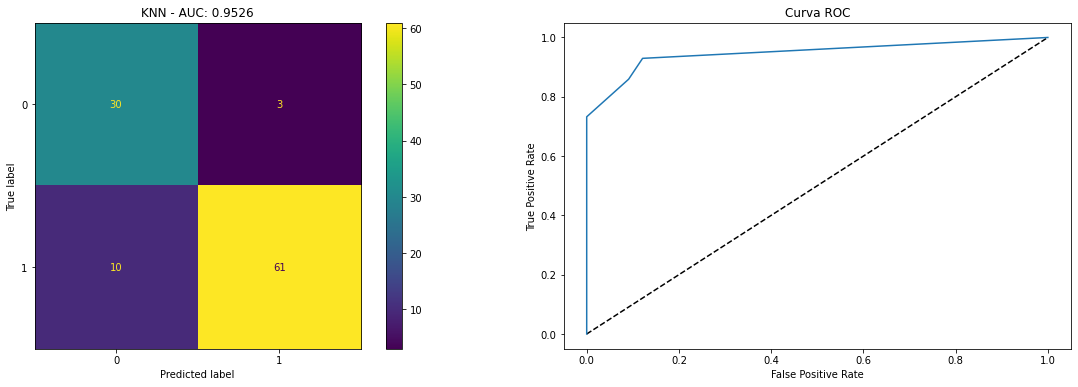

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        33
           1       0.95      0.86      0.90        71

    accuracy                           0.88       104
   macro avg       0.85      0.88      0.86       104
weighted avg       0.89      0.88      0.88       104

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -



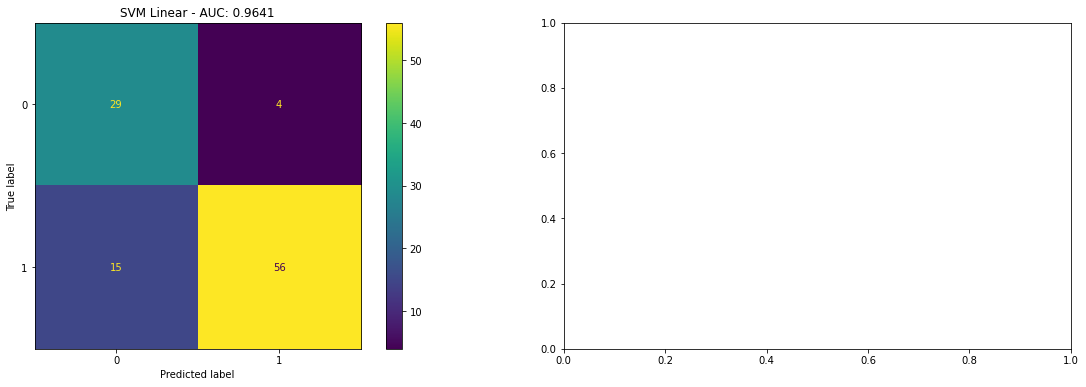

              precision    recall  f1-score   support

           0       0.66      0.88      0.75        33
           1       0.93      0.79      0.85        71

    accuracy                           0.82       104
   macro avg       0.80      0.83      0.80       104
weighted avg       0.85      0.82      0.82       104

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -



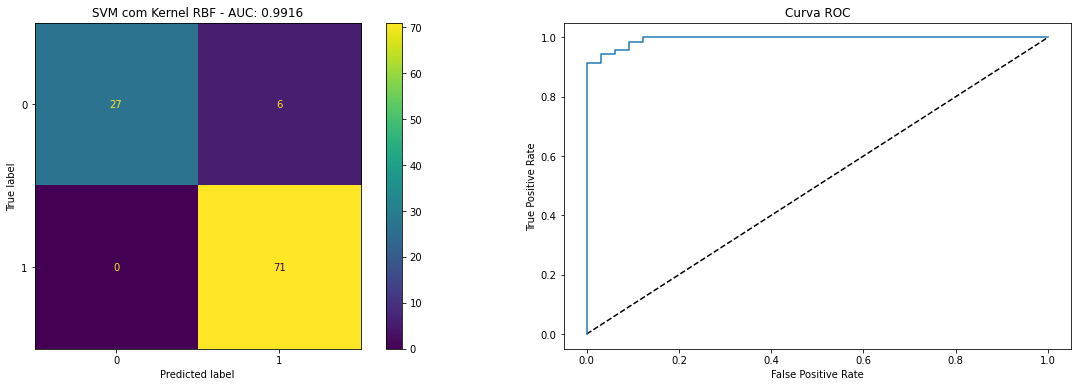

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        33
           1       0.92      1.00      0.96        71

    accuracy                           0.94       104
   macro avg       0.96      0.91      0.93       104
weighted avg       0.95      0.94      0.94       104

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -



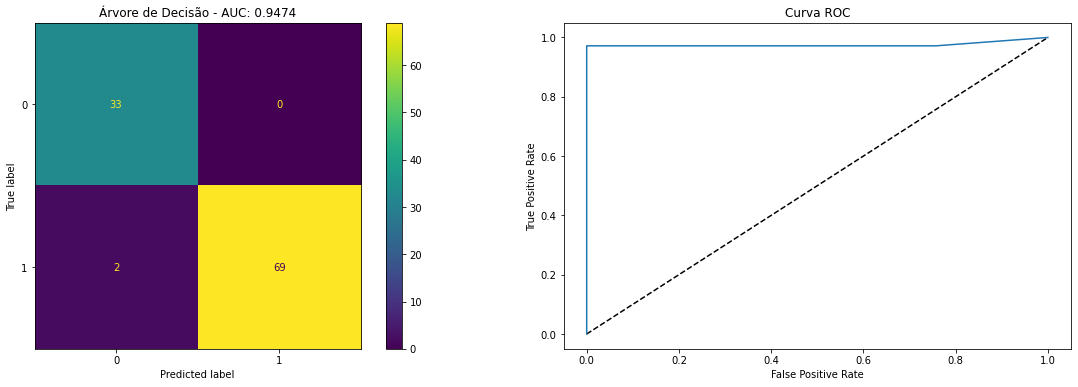

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.97      0.99        71

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -



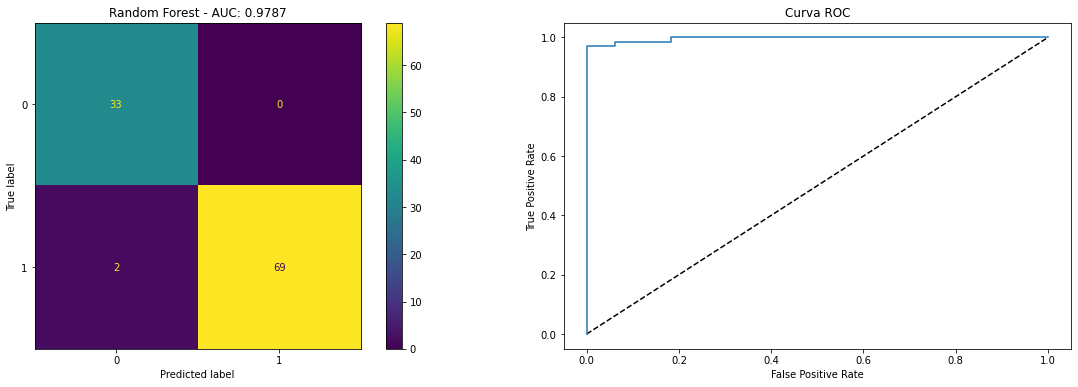

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.97      0.99        71

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -



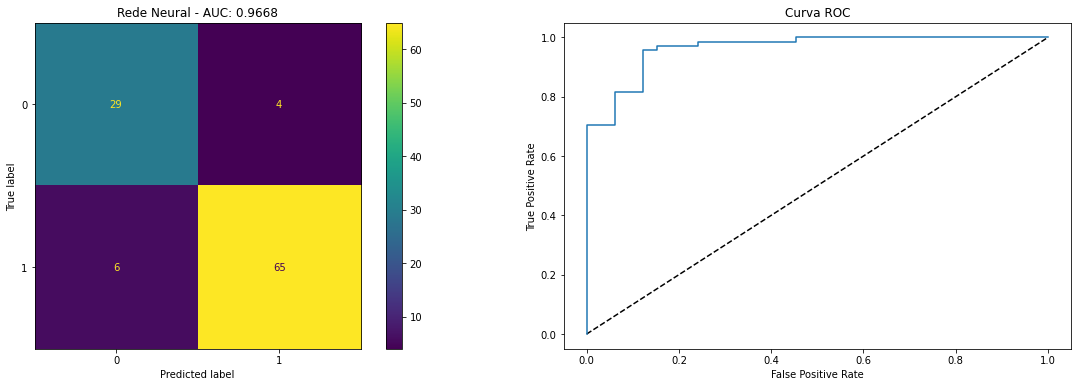

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.94      0.92      0.93        71

    accuracy                           0.90       104
   macro avg       0.89      0.90      0.89       104
weighted avg       0.91      0.90      0.90       104

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -



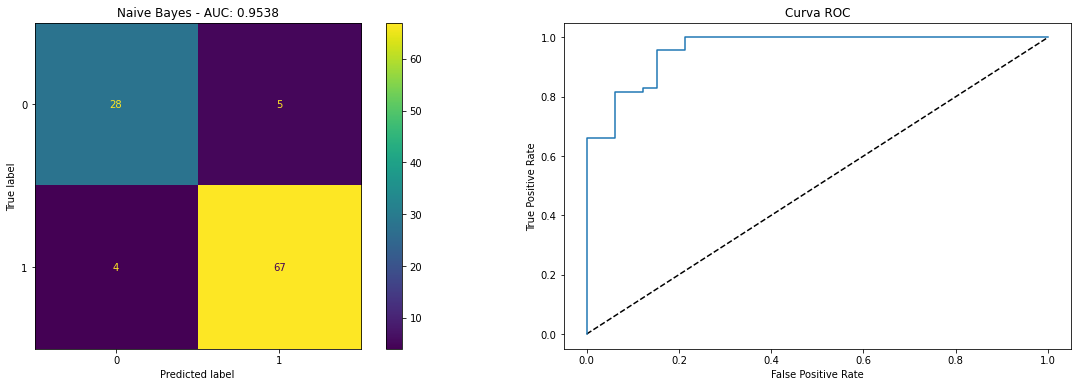

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.93      0.94      0.94        71

    accuracy                           0.91       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.91      0.91       104

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -



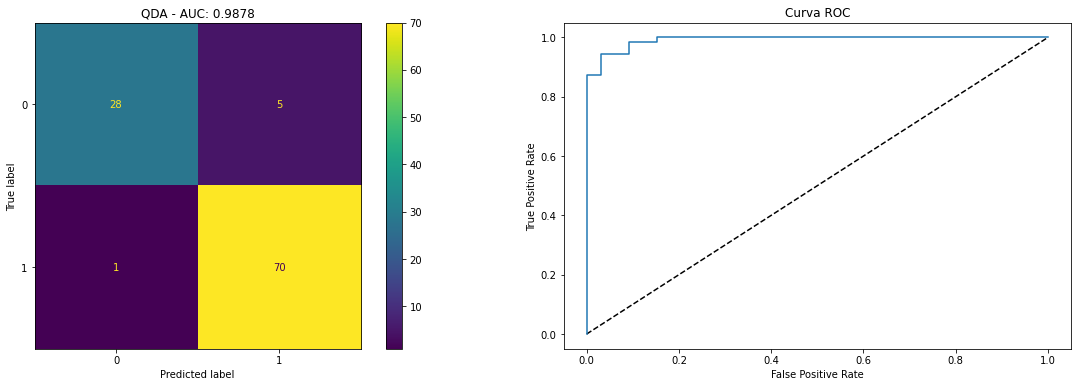

              precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.93      0.99      0.96        71

    accuracy                           0.94       104
   macro avg       0.95      0.92      0.93       104
weighted avg       0.94      0.94      0.94       104

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -



In [19]:
# Treinando os classificadores
for name, clf in clfs.items():

    # Treina o modelo
    clf.fit(X_train, y_train)

    # Calcula a métrica AUC
    cv_auc = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
    auc = np.mean(cv_auc).round(4)
    
    # Realiza previsoes com o modelo
    y_pred = clf.predict(X_test)

    # Plota matriz de confusão
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6) )
    plot_confusion_matrix(clf, X_test, y_test, ax=ax1)
    ax1.set_title(f'{name} - AUC: {auc}')

    # Plota a curva quando algoritmo calcula as probabilidades
    if hasattr(clf, 'predict_proba'):

        # Previsões de probabilidade para cada classe
        y_pred_prob = clf.predict_proba(X_test)[:,1]

        # Gera dados para curva ROC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

        # Plota curva ROC
        ax2.plot([0, 1], [0, 1], 'k--')
        ax2.plot(fpr, tpr)
        ax2.set_xlabel('False Positive Rate')
        ax2.set_ylabel('True Positive Rate')
        ax2.set_title(f'Curva ROC')
    
    # Apresenta o plot
    plt.show()

    # Imprime todas as métricas do modelo
    print(classification_report(y_test, y_pred), end='\n')
    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -', end='\n\n')

Link para as funções utilizadas:

- Métricas utilizando validação cruzada: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

- Plotagem da matrix de confusão: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

- Coletar dados da curva ROC: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

- Gerar relatório com todas as métricas de classificação: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

# Modelos promissores

In [20]:
# Seleciona os 2 modelos mais promissores

# SVM com Kernel RBF
svm = SVC(gamma=2, C=1, probability=True)
modelo_svm = svm.fit(X_train, y_train)

# Análise Discriminante Quadrática
qda = QuadraticDiscriminantAnalysis()
modelo_qda = qda.fit(X_train, y_train)

A escolha acima foi baseada nas maiores métricas AUC dentre os modelos apresentados.

Também foi considerado que, para o problema de negócio em questão, cometer um erro falso negativo é mais grave do que o erro falso positivo.

In [21]:
# Função para plotar curva de aprendizado
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, ax = plt.subplots(figsize=(15, 8))

    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("N° de registros")
    ax.set_ylabel("Acurácia")

    # Obtenção dos dados
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plotagem da curva
    ax.grid()
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Dados de treino")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Dados de teste com validação cruzada")
    ax.legend(loc="best")

    return plt

Link para função completa (Scikit-Learn): https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

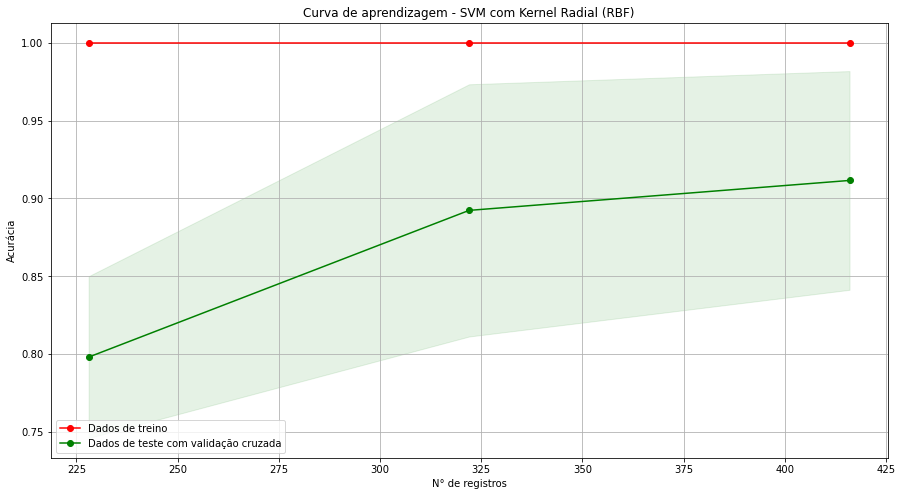

In [22]:
plot_learning_curve(modelo_svm, title="Curva de aprendizagem - SVM com Kernel Radial (RBF)", X=X, y=y, cv=5)
plt.show()

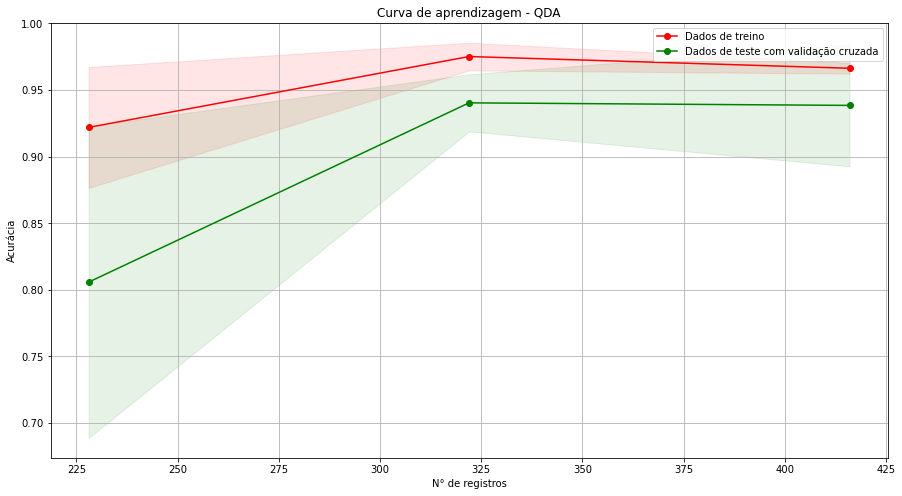

In [23]:
plot_learning_curve(modelo_qda, title="Curva de aprendizagem - QDA", X=X, y=y, cv=5)
plt.show()

# Realizando previsões com o modelo final

In [24]:
# Dados de uma pessoa
nova_pessoa = pd.DataFrame({
    'Idade':[56],
    'Gênero': ["Male"],
    'Poliúria': ["No"],
    'Polidispsia': ["No"],
    'Perda repentina de peso': ["Yes"],
    'Fraqueza': ["Yes"],
    'Polifagia': ["Yes"],
    'Candidiase': ["Yes"],
    'Visão embaçada': ["No"],
    'Coceira': ["No"],
    'Irritações': ["No"],
    'Cicatrização prolongada': ["Yes"],
    'Paralisia parcial': ["Yes"],
    'Fraqueza muscular': ["No"],
    'Calvice': ["No"],
    'Obesidade': ["Yes"]
})

In [25]:
nova_pessoa.head()

,Idade,Gênero,Poliúria,Polidispsia,Perda repentina de peso,Fraqueza,Polifagia,Candidiase,Visão embaçada,Coceira,Irritações,Cicatrização prolongada,Paralisia parcial,Fraqueza muscular,Calvice,Obesidade
0,56,Male,No,No,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,Yes


In [26]:
# Repetindo o pré-processamento dos dados
for col in nova_pessoa.select_dtypes(include='object').columns:
    if col == 'Gênero':
        nova_pessoa[col] = nova_pessoa[col].map({'Female': 0, 'Male': 1})
    else:
        nova_pessoa[col] = nova_pessoa[col].map({'No': 0, 'Yes': 1})

In [27]:
# Fazendo previsões. Lembrando que {0: 'Negative', 1: 'Positive'} para a previsão de diabetes
modelo_qda.predict(nova_pessoa)

array([1], dtype=int8)

In [30]:
modelo_qda.predict_proba(nova_pessoa)

array([[0.20683114, 0.79316886]])

In [28]:
cv_scores = cross_val_score(modelo_qda, X, y, cv=5, scoring='roc_auc')
print(f'{np.mean(cv_scores).round(4)*100}%')

98.78%


# Considerações finais

- Apesar de o modelo ter obtido uma precisão elevada (AUC -> 98,78%), ele pode não ser representativo. Foram coletados poucos registros de pessoas de um único hospital, de uma única cidade, de um único país. Não foram encontradas informações sobre a coleta dos dados, que pode conter um viés de amostragem. Seria interessante, para um projeto futuro, aplicar testes inferenciais estatísticos para avaliar se essa amosta do conjunto de dados se extende para a população como um todo.

- Outros fatores que não estavam presentes no conjunto de dados originais podem ser relevantes para o desenvolvimento de diabetes, como hábitos alimentares e estilo de vida. Coletar maiores informações talvez ajudaria a ter um modelo mais generalizável e próximo do problema de negócio.

- Existem outras técnicas que poderiam ser aplicadas como OneHotEncoding para avaliar a influência de cada categoria (sim/não, masculino/feminino) de forma isolada no modelo.

# Referência de material para estudos

- Global Report on Diabetes (WHO): https://www.who.int/diabetes/global-report/en/

- Diabetes - sintomas, causas e tratamentos (Ministério da Saúde): http://antigo.saude.gov.br/saude-de-a-z/diabetes